# K-MEAN CLUSTERING

 **KONSEP LANGKAH-LANGKAH K-MEANS CLUSTERING
Tentukan jumlah cluster k**



1.   Tentukan jumlah cluster k

  *   Misalnya, k = 2 jika ingin membagi data menjadi dua kelompok.
  *   Bisa ditentukan secara manual, atau dicari optimalnya dengan elbow method atau silhouette score.
2.   Inisialisasi centroid awal
  *   Pilih k titik awal (bisa dipilih acak, atau ditentukan sendiri)
  *   Bisa ditentukan secara manual, atau dicari optimalnya dengan elbow method atau silhouette score.
3. Hitung jarak dari setiap titik ke setiap centroid
  *   Biasanya digunakan jarak Euclidean.
4. Kelompokkan titik ke centroid terdekat
  *   Setiap data akan diberi label sesuai cluster terdekat.
5. Hitung ulang centroid (rata-rata baru dari tiap cluster)
  *   Ambil rata-rata dari semua titik dalam satu cluster untuk dapatkan centroid baru.
6. Cek konvergensi
  *   Jika label cluster tidak berubah atau centroid tidak berubah secara signifikan, maka proses berhenti.
  *   Jika belum, kembali ke langkah 3.




7. Evaluasi hasil Clustering

  evaluasi bisa dilakukan dengan :
  1. Inertia (Total Within-Cluster Sum of Squares) : jumlah total dari kuadrat jarak setiap titik data ke centroid cluster-nya. Metrik ini menunjukkan seberapa dekat anggota cluster terhadap pusat cluster-nya.
    *    Tapi inertia selalu menurun jika k bertambah, jadi tidak cukup sendiri untuk menentukan k terbaik.
    *  Nilai lebih kecil = lebih baik, artinya data lebih dekat ke centroid-nya.
    
  Berikut adalah rumus menghitung Inertia
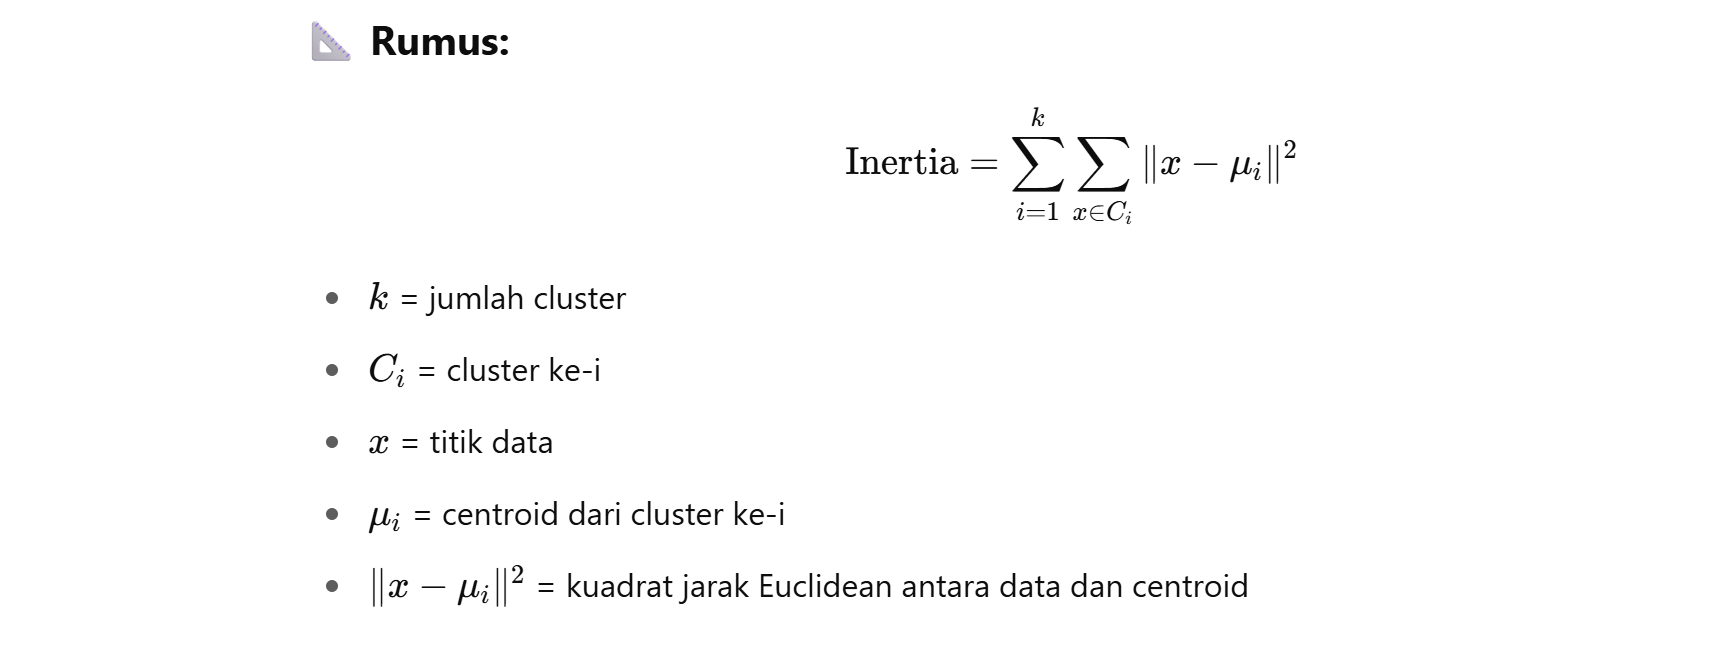

  2. Silhouette Score : Silhouette score mengukur seberapa mirip suatu data dengan cluster-nya sendiri dibanding cluster lain. Nilainya antara -1 sampai 1.
      *   ≈ 1 : Data sangat cocok dengan cluster-nya dan jauh dari cluster lain
      *   ≈ 0 : Data berada di batas antara dua cluster
      *   < 0 : Data mungkin salah tempat (lebih cocok di cluster lain)    

  Berikut rumus menghitung nilai Silhouette
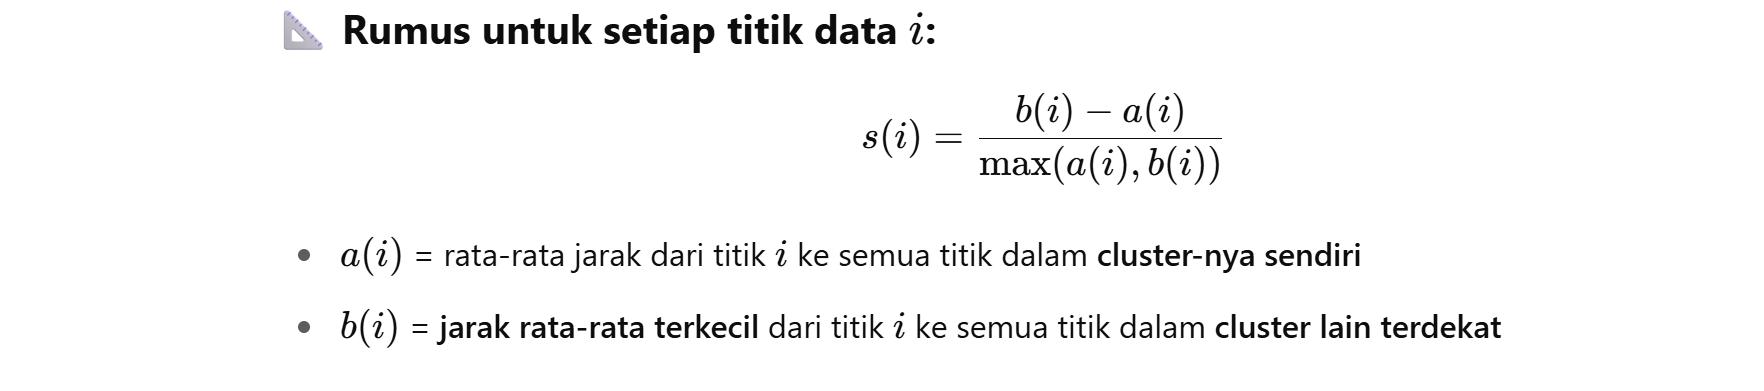



## Contoh Perhitungan Manual

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 1. Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3. Pilih dua centroid awal (misalnya dari data ke-15 dan ke-20)
centroid_1 = X_scaled[1]  # Index 14 (baris ke-15)
centroid_2 = X_scaled[114]  # Index 19 (baris ke-20)

# 4. Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

# Hitung jarak tiap titik ke centroid
df['Distance_to_Centroid_1'] = [euclidean_distance(x, centroid_1) for x in X_scaled]
df['Distance_to_Centroid_2'] = [euclidean_distance(x, centroid_2) for x in X_scaled]

# ✅ Tentukan cluster berdasarkan jarak terdekat
df['Jarak_Terdekat'] = np.minimum(df['Distance_to_Centroid_1'], df['Distance_to_Centroid_2'])
df['Cluster_Diikuti'] = np.where(
    df['Distance_to_Centroid_1'] <= df['Distance_to_Centroid_2'], 'K1', 'K2'
)

# 7. Tampilkan semua data dalam satu tabel (fitur + hasil jarak + cluster)
print("\nHasil Iterasi ke-1")
print(df.to_string(index=True))



Hasil Iterasi ke-1
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  Distance_to_Centroid_1  Distance_to_Centroid_2  Jarak_Terdekat Cluster_Diikuti
0                  5.1               3.5                1.4               0.2                1.176219                4.015566        1.176219              K1
1                  4.9               3.0                1.4               0.2                0.000000                3.769616        0.000000              K1
2                  4.7               3.2                1.3               0.2                0.523373                3.959223        0.523373              K1
3                  4.6               3.1                1.5               0.2                0.434000                3.894108        0.434000              K1
4                  5.0               3.6                1.4               0.2                1.386485                4.140030        1.386485              K1
5                  5.4          

# Implementasi K-Means dengan Sklearn

## Dengan K=2

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('/content/iris.csv')
features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Ambil centroid awal berdasarkan ID tertentu
centroid_0 = df.loc[df['Id'] == 1, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values[0]
centroid_1 = df.loc[df['Id'] == 114, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values[0]

# Gabungkan ke dalam array untuk inisialisasi
initial_centroids = np.array([centroid_0, centroid_1])

# Inisialisasi KMeans
kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1, max_iter=100, random_state=42)

# Fit model ke data
kmeans.fit(features)

# Simpan label cluster ke dataframe
df['Cluster'] = kmeans.labels_

# Cetak hasil clustering
print("Centroid akhir:")
print(kmeans.cluster_centers_)

print("\nJumlah iterasi sampai konvergen:", kmeans.n_iter_)


Centroid akhir:
[[5.00566038 3.36037736 1.56226415 0.28867925]
 [6.30103093 2.88659794 4.95876289 1.69587629]]

Jumlah iterasi sampai konvergen: 3


### Evaluasi KMeans K=2

In [5]:
from sklearn.metrics import silhouette_score

# Hitung nilai inertia
inertia = kmeans.inertia_
print("Inertia :", inertia)

# Hitung nilai silhouette score
silhouette = silhouette_score(features, df['Cluster'])
print("Silhouette Score:", silhouette)


Inertia : 152.36870647733915
Silhouette Score: 0.6808136202936816


## Dengan K=3

In [6]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('/content/iris.csv')
features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Ambil centroid awal berdasarkan ID tertentu (jika diperlukan)
centroid_0 = df.loc[df['Id'] == 1, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values[0]
centroid_1 = df.loc[df['Id'] == 114, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values[0]
centroid_2 = df.loc[df['Id'] == 50, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values[0]

# Gabungkan ke dalam array untuk inisialisasi centroid awal
initial_centroids = np.array([centroid_0, centroid_1, centroid_2])

# Inisialisasi KMeans dengan k=3
kmeans = KMeans(n_clusters=3, init=initial_centroids, n_init=1, max_iter=100, random_state=42)

# Fit model ke data
kmeans.fit(features)

# Simpan label cluster ke dataframe
df['Cluster'] = kmeans.labels_

# Cetak hasil clustering
print("Centroid akhir:")
print(kmeans.cluster_centers_)

print("\nJumlah iterasi sampai konvergen:", kmeans.n_iter_)


Centroid akhir:
[[5.28333333 3.70833333 1.49166667 0.27916667]
 [6.30103093 2.88659794 4.95876289 1.69587629]
 [4.77586207 3.07241379 1.62068966 0.29655172]]

Jumlah iterasi sampai konvergen: 3


### Evaluasi KMeans K=3

In [7]:
from sklearn.metrics import silhouette_score

# Evaluasi menggunakan Inertia dan Silhouette Score
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(features, kmeans.labels_)

# Cetak hasil evaluasi
print("Inertia :", inertia)
print("\nSilhouette Score:", silhouette_avg)


Inertia : 143.45373548406218

Silhouette Score: 0.5169605202239883


## Dengan K=4

In [8]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('/content/iris.csv')
features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Ambil centroid awal berdasarkan ID tertentu (jika diperlukan)
centroid_0 = df.loc[df['Id'] == 1, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values[0]
centroid_1 = df.loc[df['Id'] == 114, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values[0]
centroid_2 = df.loc[df['Id'] == 50, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values[0]
centroid_3 = df.loc[df['Id'] == 90, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values[0]

# Gabungkan ke dalam array untuk inisialisasi centroid awal
initial_centroids = np.array([centroid_0, centroid_1, centroid_2, centroid_3])

# Inisialisasi KMeans dengan k=4
kmeans = KMeans(n_clusters=4, init=initial_centroids, n_init=1, max_iter=100, random_state=42)

# Fit model ke data
kmeans.fit(features)

# Simpan label cluster ke dataframe
df['Cluster'] = kmeans.labels_

# Cetak hasil clustering
print("Centroid akhir:")
print(kmeans.cluster_centers_)

print("\nJumlah iterasi sampai konvergen:", kmeans.n_iter_)


Centroid akhir:
[[5.26538462 3.68076923 1.50384615 0.29230769]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [4.725      3.13333333 1.42083333 0.19166667]
 [5.88360656 2.74098361 4.38852459 1.43442623]]

Jumlah iterasi sampai konvergen: 10


### Evaluasi KMeans K=4

In [9]:
from sklearn.metrics import silhouette_score

# Evaluasi menggunakan Inertia dan Silhouette Score
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(features, kmeans.labels_)

# Cetak hasil evaluasi
print("\nInertia (Total Within-Cluster Sum of Squares):", inertia)
print("\nSilhouette Score:", silhouette_avg)



Inertia (Total Within-Cluster Sum of Squares): 71.34822351828498

Silhouette Score: 0.41540495586480414


## Evaluasi Keseluruhan

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('/content/iris.csv')
features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Daftar nilai k
k_values = [2, 3, 4]

# Simpan hasil evaluasi
results = []

# ID yang akan digunakan sebagai centroid awal untuk masing-masing cluster
centroid_ids_by_k = {
    2: [1, 114],
    3: [1, 114, 50],
    4: [1, 114, 50, 90]
}

for k in k_values:
    # Ambil centroid awal berdasarkan ID
    centroid_ids = centroid_ids_by_k[k]
    initial_centroids = np.array([
        df.loc[df['Id'] == cid, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values[0]
        for cid in centroid_ids
    ])

    # Inisialisasi dan training KMeans
    kmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1, max_iter=100, random_state=42)
    kmeans.fit(features)

    # Simpan evaluasi
    inertia = kmeans.inertia_
    silhouette = silhouette_score(features, kmeans.labels_)
    centroids = kmeans.cluster_centers_
    n_iter = kmeans.n_iter_

    results.append({
        'k': k,
        'Centroid Akhir': centroids,
        'Iterasi': n_iter,
        'Inertia': inertia,
        'Silhouette Score': silhouette
    })

# Tampilkan hasil evaluasi
print("Evaluasi Clustering KMeans dari k=2 sampai k=4:\n")
for res in results:
    print(f"--- k = {res['k']} ---")
    print("Centroid akhir:")
    print(np.round(res['Centroid Akhir'], 4))
    print("Jumlah Iterasi:", res['Iterasi'])
    print("Inertia:", round(res['Inertia'], 6))
    print("Silhouette Score:", round(res['Silhouette Score'], 6))
    print()

# Tampilkan ringkasan dalam bentuk DataFrame
summary_df = pd.DataFrame({
    'k': [r['k'] for r in results],
    'Inertia': [r['Inertia'] for r in results],
    'Silhouette Score': [r['Silhouette Score'] for r in results]
})

print("Ringkasan Evaluasi:")
print(summary_df)

Evaluasi Clustering KMeans dari k=2 sampai k=4:

--- k = 2 ---
Centroid akhir:
[[5.0057 3.3604 1.5623 0.2887]
 [6.301  2.8866 4.9588 1.6959]]
Jumlah Iterasi: 3
Inertia: 152.368706
Silhouette Score: 0.680814

--- k = 3 ---
Centroid akhir:
[[5.2833 3.7083 1.4917 0.2792]
 [6.301  2.8866 4.9588 1.6959]
 [4.7759 3.0724 1.6207 0.2966]]
Jumlah Iterasi: 3
Inertia: 143.453735
Silhouette Score: 0.516961

--- k = 4 ---
Centroid akhir:
[[5.2654 3.6808 1.5038 0.2923]
 [6.8538 3.0769 5.7154 2.0538]
 [4.725  3.1333 1.4208 0.1917]
 [5.8836 2.741  4.3885 1.4344]]
Jumlah Iterasi: 10
Inertia: 71.348224
Silhouette Score: 0.415405

Ringkasan Evaluasi:
   k     Inertia  Silhouette Score
0  2  152.368706          0.680814
1  3  143.453735          0.516961
2  4   71.348224          0.415405


**Penjelasan**

Dasar Evaluasi :
1. Inertia: Semakin kecil inertia, semakin baik (cluster lebih kompak).
2. Silhouette Score: semakin mendekati 1, semakin baik kualitas clustering-nya.
---
**Evaluasi KMeans k=2 sampai k=4**
1. K=2
  *  Inertia: 152.37
  *  Silhouette Score: 0.6808
  *  Penjelasan :
    *  Silhouette score mendekati 1, menunjukkan bahwa setiap titik berada cukup dekat dengan centroid-nya dan jauh dari centroid cluster lain.
    *  Ini menunjukkan pemisahan cluster yang jelas dan berkualitas tinggi.
    *  Meskipun inertia belum minimum, ini kompromi terbaik antara jarak internal dan pemisahan antar cluster.
2. K=3
 *  Inertia: 143.45 (lebih kecil dari k=2)
  * Silhouette Score: 0.5170
  *  Penjelasan :
    *  Inertia memang menurun (karena menambah cluster), tetapi Silhouette score menurun cukup signifikan.
    *  Ini menandakan bahwa jarak antar cluster tidak sejauh sebelumnya, beberapa titik mulai sulit dibedakan cluster-nya.
    *  jadi kualitas cluster menurun walaupun inertia lebih kecil.
3. K=4
 *  Inertia: 71.35 (paling kecil)
  * Silhouette Score: 0.4154
  *  Penjelasan :
    *  Inertia sangat kecil karena banyak cluster, tetapi ini justru indikasi overfitting.
    * Silhouette score jauh dari 1, menunjukkan pemisahan cluster semakin buruk.
    *  Banyak titik berada di perbatasan antar cluster → kualitas pembentukan cluster rendah.


---



**Kesimpulan**

Jumlah cluster terbaik: k = 2
* Karena silhouette score paling tinggi dan mendekati 1, artinya setiap data point berada dekat dengan cluster-nya dan jauh dari cluster lain.
* Memberikan kombinasi terbaik antara kompaknya cluster dan jauhnya antar cluster.










### grafik SSE (Inertia) dan Silhouette Score dari hasil evaluasi clustering KMeans

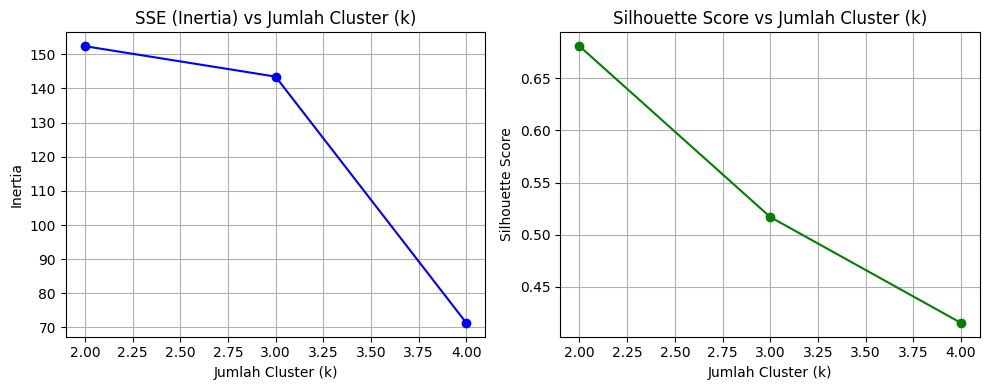

In [11]:
import matplotlib.pyplot as plt

# Plot SSE (Inertia)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(summary_df['k'], summary_df['Inertia'], marker='o', color='blue')
plt.title('SSE (Inertia) vs Jumlah Cluster (k)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(summary_df['k'], summary_df['Silhouette Score'], marker='o', color='green')
plt.title('Silhouette Score vs Jumlah Cluster (k)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()